In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Read in data
data = pd.read_csv('Resources/exoplanet_red1.csv')
data.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_srad
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.146,2.95750,616.0,2.26,793.0,93.59,35.8,5455.0,0.927
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,875.0,2.83,443.0,9.11,25.8,5455.0,0.927
2,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10800.0,14.60,638.0,39.30,76.3,5853.0,0.868
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8080.0,33.46,1395.0,891.96,505.6,5805.0,0.791
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.0,2.75,1406.0,926.16,40.9,6031.0,1.046


In [3]:
#Set independent variables
X = data.iloc[:,1:16]
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_srad
0,0,0,0,0,9.488036,170.538750,0.146,2.95750,616.0,2.26,793.0,93.59,35.8,5455.0,0.927
1,0,0,0,0,54.418383,162.513840,0.586,4.50700,875.0,2.83,443.0,9.11,25.8,5455.0,0.927
2,0,1,0,0,19.899140,175.850252,0.969,1.78220,10800.0,14.60,638.0,39.30,76.3,5853.0,0.868
3,0,1,0,0,1.736952,170.307565,1.276,2.40641,8080.0,33.46,1395.0,891.96,505.6,5805.0,0.791
4,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.0,2.75,1406.0,926.16,40.9,6031.0,1.046


In [4]:
#Set dependent variable
y = data.iloc[:,0]

In [5]:
#Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
#Scale data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.774
k: 3, Train/Test Score: 0.897/0.791
k: 5, Train/Test Score: 0.875/0.807
k: 7, Train/Test Score: 0.868/0.807
k: 9, Train/Test Score: 0.859/0.802
k: 11, Train/Test Score: 0.854/0.806
k: 13, Train/Test Score: 0.852/0.805
k: 15, Train/Test Score: 0.847/0.814
k: 17, Train/Test Score: 0.844/0.813
k: 19, Train/Test Score: 0.845/0.810


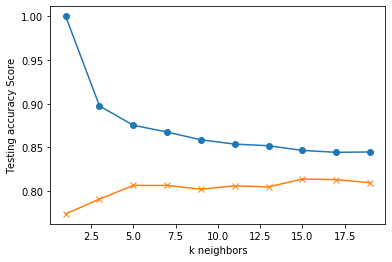

In [7]:
#Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [8]:
#KNN 11 appears to provide the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.806


In [9]:
#Preform Grid Search to tune the model
from sklearn.model_selection import GridSearchCV

In [10]:
#Set parameters for Grid Search
grid_params = {
    'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
}

In [11]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1)
gs_results = gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:   23.5s finished


In [12]:
#List the best parameters for this dataset
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

In [13]:
#List the best score
gs_results.best_score_

0.8357971014492752

In [14]:
best_model = KNeighborsClassifier(n_neighbors=13, weights='distance', metric='manhattan')
results = best_model.fit(X_train_scaled, y_train)

In [15]:
#Analyze model accuracy with test data
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 333  236   13]
 [ 135  407   17]
 [   9    1 1149]]
                precision    recall  f1-score   support

     CANDIDATE       0.70      0.57      0.63       582
     CONFIRMED       0.63      0.73      0.68       559
FALSE POSITIVE       0.97      0.99      0.98      1159

      accuracy                           0.82      2300
     macro avg       0.77      0.76      0.76      2300
  weighted avg       0.82      0.82      0.82      2300



In [23]:
import pickle

In [26]:
#Save model
filename = 'final_KNN_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))